<a href="https://colab.research.google.com/github/minhaz1172/Deep-Learning/blob/main/Data_Augmentation_and_training_augmented_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# We wiil use CIFAR-10 dataset (a popular image dataset for classification) to demonstrate data augmentation. We create a simple convolutional neural network (CNN) to classify the images, using augmented data during training

# **import necessary Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt


# **lOAD tHE DATASET cifar-10**

In [2]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


# **Image normalization**

In [3]:
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

# Convert the class labels  to one hot encoded vectors for multiclass classification

In [4]:
y_train_cat=to_categorical(y_train,10) ## 10 classes in CIFAR-10
y_test_cat=to_categorical(y_test,10)


# Visualize sample image from the training data

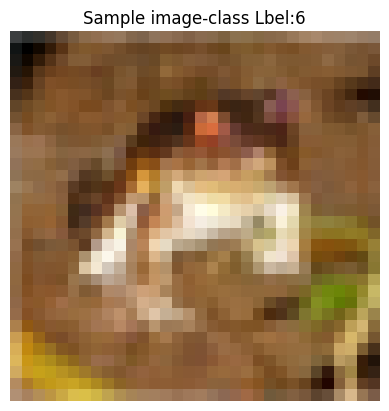

In [8]:
plt.imshow(X_train[0])
plt.title(f"Sample image-class Lbel:{y_train[0][0]}")
plt.axis('off')# Hide the axis to focus on the image
plt.show()

# Set up the Data Augmentation via ImageDataGenerator
#Create an ImageDataGenerator object that defines how to augment images

In [10]:
datagen=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.1,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Reshape the sample  image which will augmented

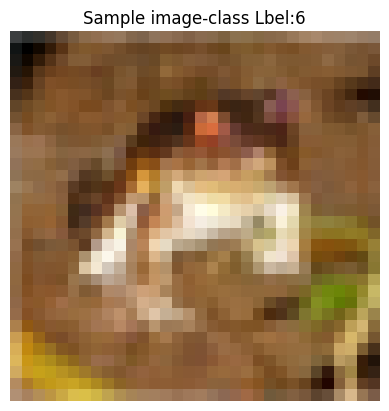

In [11]:
img=X_train[0]
plt.imshow(img)
plt.title(f"Sample image-class Lbel:{y_train[0][0]}")
plt.axis('off')# Hide the axis to focus on the image
plt.show()


# Reshape sample image
.flow() method of ImageDataGenerator expects a batch of images — not just one image.
img = img.reshape((1,) + img.shape) converts img.shape = (32, 32, 3)  # just one image (CIFAR-10 size)    to img = img.reshape((1, 32, 32, 3))



In [16]:
img=img.reshape((1,)+img.shape)

# Generate augmented images and display them

In [17]:
i=0
augmented_images=[]
for batch in datagen.flow(img,batch_size=1):
  augmented_images.append(batch[0].astype('uint8'))
  i+=1
  if i==10:
   break

| Code                    | Meaning                                      |
|-------------------------|----------------------------------------------|
| `plt.subplots(1, 4)`    | Create 1 row and 4 columns of plots          |
| `figsize=(20, 5)`       | Size of the full figure (in inches)          |
| `axes.flatten()`        | Convert to 1D list for easy iteration        |
| `zip(images, axes)`     | Pair each image with a plot slot             |
| `ax.imshow(img)`        | Show the image on that subplot               |
| `plt.tight_layout()`    | Auto-adjust layout to avoid overlap          |
| `plt.show()`            | Render the plot on screen                    |


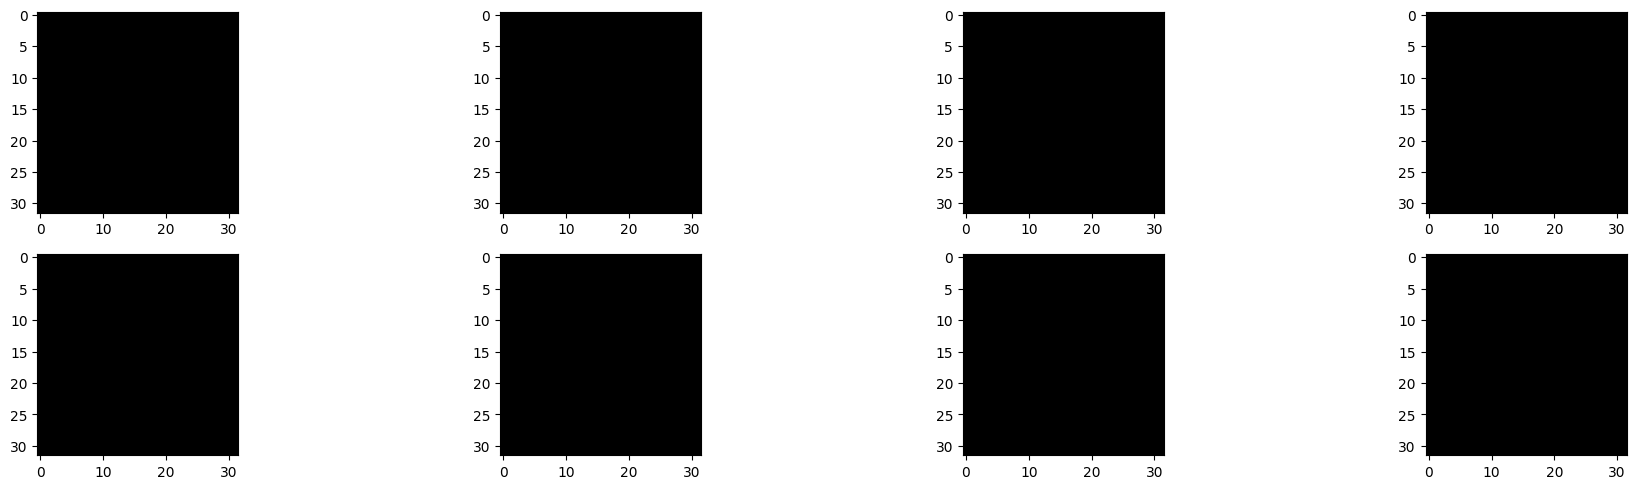

In [19]:
# Display augmented images
fig,axes=plt.subplots(,4,figsize=(20,5))
axes=axes.flatten()
for img,ax in zip(augmented_images,axes):
    ax.imshow(img)
plt.tight_layout()
plt.show()

# Now create many augmented images and show them

# ** After that we sh can train and build a cnn model according to augmentewd imagest**